In [1]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")

## Pie price dynamic

In [2]:
moex_bcs = pd.read_csv('moex_bcs.csv')

moex_bcs.rename(columns={'<DATE>':'Date', '<TIME>':'Time', '<CLOSE>':'Value'}, inplace=True)

moex_bcs = moex_bcs.drop(['<TICKER>','<PER>','<OPEN>','<HIGH>','<LOW>','<VOL>'], axis=1)

moex_bcs.index = pd.to_datetime(moex_bcs['Date'] + ' ' + moex_bcs['Time'], dayfirst = True)

moex_bcs = moex_bcs.drop(['Date','Time'], axis=1)

moex_bcs = moex_bcs.resample('D')
moex_bcs = moex_bcs.interpolate()

moex_bcs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 957 entries, 2021-08-31 to 2024-04-13
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   957 non-null    float64
dtypes: float64(1)
memory usage: 15.0 KB


In [3]:
moex_bcs.head(4)

,Value
2021-08-31,485.8
2021-09-01,480.6
2021-09-02,483.4
2021-09-03,475.1


In [4]:
moex_bcs.tail(4)

,Value
2024-04-10,5.60
2024-04-11,5.64
2024-04-12,5.66
2024-04-13,5.66


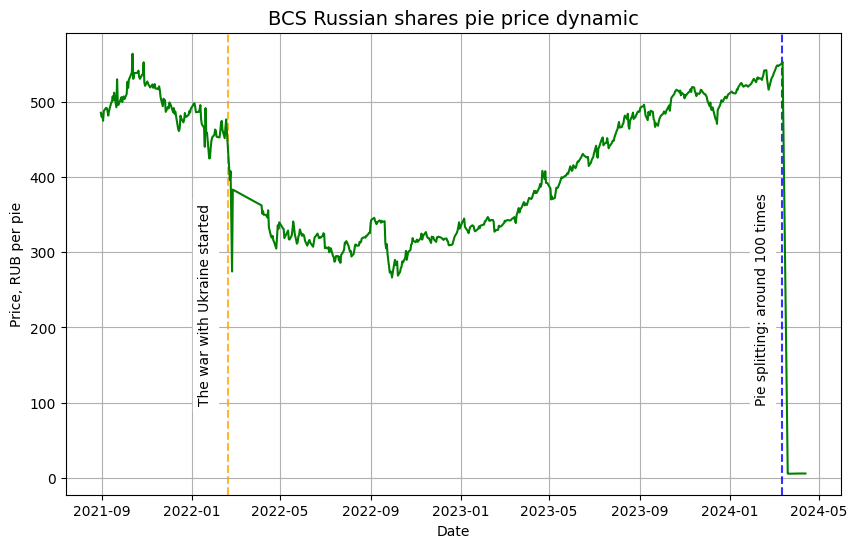

In [5]:
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,6))

start = '2021-08-31'
end = '2024-04-13'

plt.axvline(x=datetime.date(2022, 2, 19), color='orange', linestyle='dashed', alpha=0.8)
plt.axvline(x=datetime.date(2024, 3, 12), color='blue', linestyle='dashed', alpha=0.8)

# plt.axvspan(xmin=datetime.date(2023, 1, 1), xmax=datetime.date(2023, 8, 1), alpha=0.1, color='blue')

plt.plot(moex_bcs['Value'][start:end], label='Pie price', color='green')

# plt.legend(title='BCS Russian shares (pie prices)', framealpha=1)

plt.title('BCS Russian shares pie price dynamic', fontsize=14)

plt.xlabel('Date')
plt.ylabel('Price, RUB per pie')

plt.text(x=datetime.date(2022, 1, 10), y=100, s='The war with Ukraine started', rotation=90, bbox=dict(color='white'), color='black')
plt.text(x=datetime.date(2024, 2, 5), y=100, s='Pie splitting: around 100 times', rotation=90, bbox=dict(color='white'), color='black')
plt.grid()
plt.savefig('Pie_pr_initial.pdf')
None

In [6]:
value_2024_03_13 = moex_bcs.loc['2024-03-13', 'Value']
value_2024_03_13

553.5

In [7]:
value_2024_03_20 = moex_bcs.loc['2024-03-20', 'Value']
value_2024_03_20

5.545

In [8]:
# Calculate the split multiplier
split_mult = moex_bcs.loc['2024-03-13', 'Value']/moex_bcs.loc['2024-03-20', 'Value'] # note that it takes time for the market to 
# change the price accordingly
print(f'pie split multiplier: {split_mult}')

# Multiply values after the pi splitting by that difference
moex_bcs.loc['2024-03-20':, 'Value'] *= split_mult

pie split multiplier: 99.81965734896303


In [9]:
moex_bcs.loc['2024-03-13':'2024-03-22', 'Value']

2024-03-13    553.500000
2024-03-14    475.220714
2024-03-15    396.941429
2024-03-16    318.662143
2024-03-17    240.382857
2024-03-18    162.103571
2024-03-19     83.824286
2024-03-20    553.500000
2024-03-21    541.022543
2024-03-22    544.017133
Freq: D, Name: Value, dtype: float64

In [10]:
# now extrapolate the values when the market was reacting (it was just the 
# stickness of prices which didn't illustrate the real assets' chande of the fund)
# Define the two known indexes (when the price was fair and stable)
index_start = '2024-03-12'
index_end = '2024-03-20'

# Get the values at the known indexes
value_start = moex_bcs.loc[index_start, 'Value']
value_end = moex_bcs.loc[index_end, 'Value']

# Get the date range between the two known indexes
date_range = pd.date_range(start=index_start, end=index_end)

# Calculate the step size for linear interpolation
step_size = (value_end - value_start) / (len(date_range) - 1)

# Extrapolate values between the two known indexes
extrapolated_values = [value_start + i * step_size for i in range(len(date_range))]

# Create a DataFrame with the extrapolated values
extrapolated_df = pd.DataFrame({'Value': extrapolated_values}, index=date_range)

# Combine the original DataFrame with the extrapolated DataFrame
moex_bcs = pd.concat([moex_bcs.loc[:index_start], extrapolated_df, moex_bcs.loc[index_end:]])

# Remove duplicates within the range '2024-03-13' to '2024-03-20'
moex_bcs = moex_bcs[~moex_bcs.index.duplicated(keep='first')]

moex_bcs.loc['2024-03-13':'2024-03-20', 'Value']

2024-03-13    551.75
2024-03-14    552.00
2024-03-15    552.25
2024-03-16    552.50
2024-03-17    552.75
2024-03-18    553.00
2024-03-19    553.25
2024-03-20    553.50
Name: Value, dtype: float64

In [11]:
moex_bcs.tail()

,Value
2024-04-09,563.981064
2024-04-10,558.990081
2024-04-11,562.982867
2024-04-12,564.979261
2024-04-13,564.979261


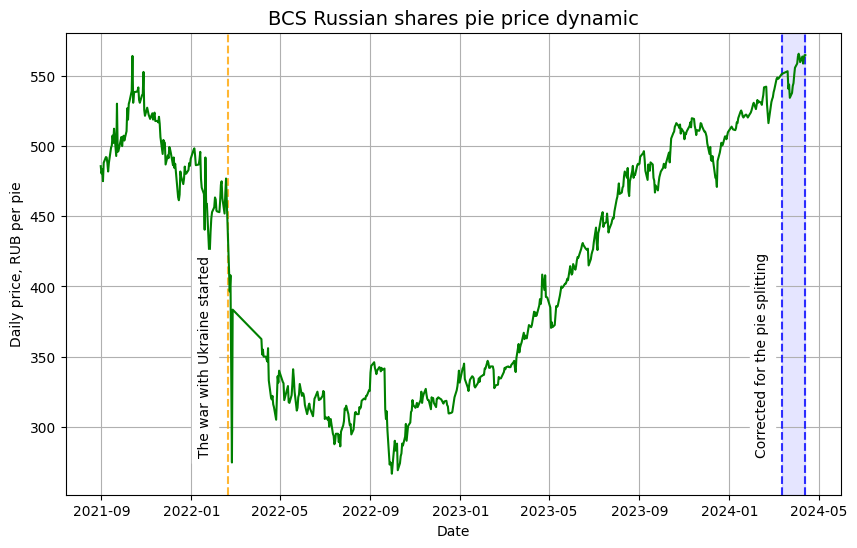

In [12]:
# and build the graph again
fig = plt.figure(figsize=(10,6))

start = '2021-08-31'
end = '2024-04-13'

plt.axvline(x=datetime.date(2022, 2, 19), color='orange', linestyle='dashed', alpha=0.8)
plt.axvline(x=datetime.date(2024, 3, 12), color='blue', linestyle='dashed', alpha=0.8)
plt.axvline(x=datetime.date(2024, 4, 12), color='blue', linestyle='dashed', alpha=0.8)
plt.axvspan(xmin=datetime.date(2024, 3, 12), xmax=datetime.date(2024, 4, 12), alpha=0.1, color='blue')

plt.plot(moex_bcs['Value'][start:end], label='Pie price', color='green')

# plt.legend(title='BCS Russian shares (pie prices)', framealpha=1)

plt.title('BCS Russian shares pie price dynamic', fontsize=14)

plt.xlabel('Date')
plt.ylabel('Daily price, RUB per pie')

plt.text(x=datetime.date(2022, 1, 10), y=280, s='The war with Ukraine started', rotation=90, bbox=dict(color='white'), color='black')
plt.text(x=datetime.date(2024, 2, 5), y=280, s='Corrected for the pie splitting', rotation=90, bbox=dict(color='white'), color='black')
plt.grid()
plt.savefig('Pie_pr_corrected.pdf')
None

## Sharpe

Sharpe Ratio =  $\frac{R_p - R_f}{σ_p}$

Where:
- R_p is the expected return of the investment.
- R_f is the risk-free rate.
- σ_p is the standard deviation of the investment's returns.

### Expected return on the investment (annual)

Return = $\frac{P_t - P_{t-1}}{P_{t-1}}$

Where:
- P_t is the price at time t.
- P_{t-1} is the price at time eriod.

In [13]:
# Calculate percentage change without multiplying by 100
# take the year expected return
Returns = moex_bcs['Value'].resample('Y').ffill().pct_change()
Return = Returns.mean()
Return

0.10736500830747431

### Risk-free rate - Central Bank refinance  rate (annual)

In [14]:
from bs4 import BeautifulSoup
from requests import get
import urllib

import time

import datetime
from dateutil.relativedelta import relativedelta

In [15]:
start_year = str(2021)
startonth = '01'
start_date = str(31)

end_year = str(2024)
endonth = '04'
end_date = str(13)

url = 'https://www.cbr.ru/hd_base/keyrate/?UniDbQuery.Posted=True&UniDbQuery.From='
url = url + start_date + '.' + startonth + '.' +  start_year + '&UniDbQuery.To=.'\
+ end_date + '.' + endonth + '.'+ end_year

response = get(url)

In [16]:
response

<Response [200]>

In [17]:
soup = BeautifulSoup(response.text, 'html.parser')

In [18]:
rates_table = soup.find_all('div', class_='table-wrapper')[0]
    
rates_n_dates = rates_table.find_all('td')

In [19]:
dates = []
rates = []
    
for i, j in enumerate(rates_n_dates):
    if i%2 == 0:
        dates.append(j.text)
    else:
        rates.append(j.text)
            
rates = list(map(lambda x: float(x.replace(',', '.')), rates))
            
rates_table = pd.DataFrame({'Date': dates, 'Rate': rates})

In [20]:
rates_table

,Date,Rate
0,15.04.2024,16.00
1,12.04.2024,16.00
2,11.04.2024,16.00
3,10.04.2024,16.00
4,09.04.2024,16.00
...,...,...
808,05.02.2021,4.25
809,04.02.2021,4.25
810,03.02.2021,4.25
811,02.02.2021,4.25


In [21]:
rates_table.set_index('Date', inplace=True)
rates_table

,Rate
Date,
15.04.2024,16.00
12.04.2024,16.00
11.04.2024,16.00
10.04.2024,16.00
09.04.2024,16.00
...,...
05.02.2021,4.25
04.02.2021,4.25
03.02.2021,4.25


In [22]:
Mean_risk_free_r = rates_table['Rate'].mean()/100 #because in %
Mean_risk_free_r

0.0951660516605166

### Standard deviation of the investment returns (annual)

In [23]:
std_returns = Returns.std()
std_returns

0.4328624895533663

### The sharpe coefficient

In [24]:
sharpe = (Return - Mean_risk_free_r)/std_returns
sharpe.round(3)

0.028

### Comparison to the benchmark (MOEX index)

In [25]:
moex = pd.read_csv('moex_index.csv', sep=';', encoding='latin1')

In [26]:
Returns_bcs = moex_bcs['Value'].resample('m').ffill().pct_change()
Returns_bcs.name = 'BCS_r'
Returns_bcs = Returns_bcs.to_frame()
Returns_bcs = Returns_bcs.drop_duplicates(keep='first')
Returns_bcs.head(3)

,BCS_r
2021-08-31,NaN
2021-09-30,0.041890
2021-10-31,0.034542


In [27]:
moex.tail(3)

history
SNDX IMOEX 10.04.2024 Èíäåêñ ÌîñÁèðæè Èíäåêñ ÌîñÁèðæè 3439,11 3424,75 3440,03 3405,46 68204100239,98 0 0 2 6067659667641,639  RUB 1764312998,576100 3     NaN
           11.04.2024 Èíäåêñ ÌîñÁèðæè Èíäåêñ ÌîñÁèðæè 3439,53 3442,84 3455,61 3431,18 53525607759,33 0 0 2 6068405796074,9795 RUB 1764312998,576100 3     NaN
           12.04.2024 Èíäåêñ ÌîñÁèðæè Èíäåêñ ÌîñÁèðæè 3456,24 3448,6  3464    3446,79 63944927459,55 0 0 2 6097892530647,947  RUB 1764312998,576100 3     NaN

In [28]:
moex.reset_index(inplace=True)
moex.rename(columns={'level_5': 'CLOSE', 'level_2': 'TRADEDATE'}, inplace=True)
moex = moex.loc[:, ['TRADEDATE', 'CLOSE']]
moex = moex.iloc[1:]
moex['TRADEDATE'] = pd.to_datetime(moex['TRADEDATE'])# to dt
moex['TRADEDATE'] = moex['TRADEDATE'].dt.strftime('%m-%d-%Y') # change the format, het object
moex['TRADEDATE'] = pd.to_datetime(moex['TRADEDATE']) # to dt again
moex['CLOSE'] = moex['CLOSE'].str.replace(',', '.').astype(float)
moex

,TRADEDATE,CLOSE
1,2021-08-13,3873.00
2,2021-08-16,3895.31
3,2021-08-17,3943.01
4,2021-08-18,3925.17
5,2021-08-19,3853.98
...,...,...
655,2024-04-08,3417.38
656,2024-04-09,3414.26
657,2024-04-10,3439.11
658,2024-04-11,3439.53


In [29]:
moex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 1 to 659
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   TRADEDATE  659 non-null    datetime64[ns]
 1   CLOSE      659 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.4 KB


In [30]:
moex.set_index('TRADEDATE', inplace=True)
moex.head(3)

,CLOSE
TRADEDATE,
2021-08-13,3873.00
2021-08-16,3895.31
2021-08-17,3943.01


In [31]:
moex.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 659 entries, 2021-08-13 to 2024-04-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLOSE   659 non-null    float64
dtypes: float64(1)
memory usage: 10.3 KB


In [32]:
Returns_moex= moex['CLOSE'].resample('m').ffill().pct_change()
Returns_moex.name = 'MOEX_r'
Returns_moex = Returns_moex.to_frame()
Returns_moex = Returns_moex.drop_duplicates(keep='first')
Returns_moex

,MOEX_r
TRADEDATE,
2021-08-31,NaN
2021-09-30,0.047094
2021-10-31,0.011327
2021-11-30,-0.062508
2021-12-31,-0.026559
2022-01-31,-0.067827
2022-02-28,-0.300223
2022-03-31,0.094326
2022-04-30,-0.095557


In [33]:
Returns_bcs

,BCS_r
2021-08-31,NaN
2021-09-30,0.041890
2021-10-31,0.034542
2021-11-30,-0.057547
2021-12-31,-0.005066
2022-01-31,-0.072641
2022-02-28,-0.160125
2022-03-31,-0.043649
2022-04-30,-0.070354
2022-05-31,-0.052941


In [34]:
Returns_moex.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 2021-08-31 to 2024-04-30
Freq: ME
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MOEX_r  32 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


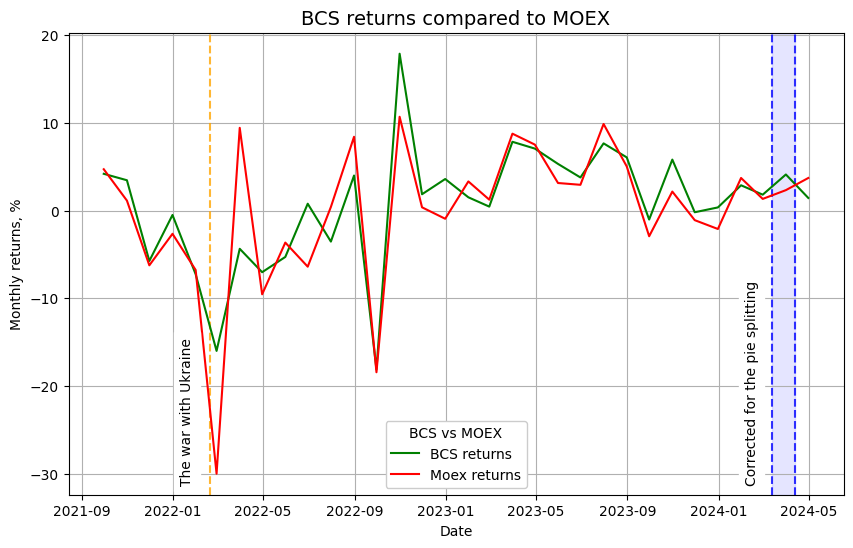

In [35]:
# build a graph to compare the perfomance of BCS and MOEX
fig = plt.figure(figsize=(10,6))

start = '2021-08-31'
end = '2024-04-30'
plt.axvline(x=datetime.date(2022, 2, 19), color='orange', linestyle='dashed', alpha=0.8)
plt.axvline(x=datetime.date(2024, 3, 12), color='blue', linestyle='dashed', alpha=0.8)
plt.axvline(x=datetime.date(2024, 4, 12), color='blue', linestyle='dashed', alpha=0.8)
plt.axvspan(xmin=datetime.date(2024, 3, 12), xmax=datetime.date(2024, 4, 12), alpha=0.1, color='blue')

plt.plot(Returns_bcs['BCS_r'][start:end]*100, label='BCS returns', color='green')
plt.plot(Returns_moex['MOEX_r'][start:end]*100, label='Moex returns', color='red')
plt.legend(title='BCS vs MOEX', framealpha=1)

plt.title('BCS returns compared to MOEX', fontsize=14)

plt.xlabel('Date')
plt.ylabel('Monthly returns, %')

plt.text(x=datetime.date(2022, 1, 10), y=-31, fontsize=10, s='The war with Ukraine', rotation=90, bbox=dict(color='white'), color='black')
plt.text(x=datetime.date(2024, 2, 5), y=-31, fontsize=10, s='Corrected for the pie splitting', rotation=90, bbox=dict(color='white'), color='black')
plt.grid()
plt.savefig('BSC_MOEX.pdf')
None

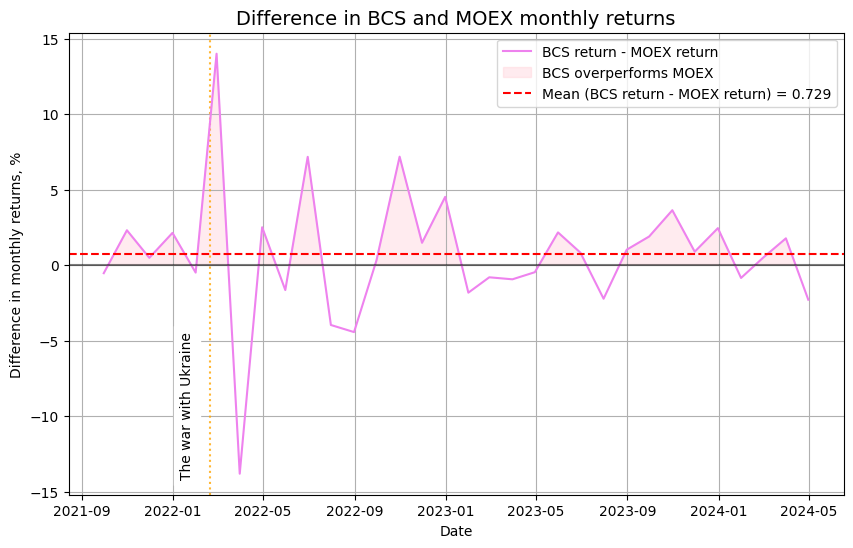

In [36]:
# build a graph for the difference in returns
import numpy as np
fig = plt.figure(figsize=(10,6))
plt.axvline(x=datetime.date(2022, 2, 19), color='orange', linestyle=':', alpha=0.8)

Returns_dif = Returns_bcs['BCS_r']*100 - Returns_moex['MOEX_r']*100
plt.plot(Returns_dif, label='BCS return - MOEX return', color='violet')
# Generate daily dates for interpolation/extrapolation
Returns_dif_days = pd.date_range(start=start, end=end, freq='D')

# Interpolate the monthly values to daily values
Returns_dif_days = Returns_dif.reindex(Returns_dif_days).interpolate(method='linear')

# Create a boolean mask based on the condition (value >= const)
mask = Returns_dif_days >= 0

# Fill between the time series and the constant value where the condition is True
plt.fill_between(Returns_dif_days.index, Returns_dif_days, 0, where=mask, color='pink', alpha=0.3, label='BCS overperforms MOEX')
plt.title('Difference in BCS and MOEX monthly returns', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Difference in monthly returns, %')

plt.text(x=datetime.date(2022, 1, 10), y=-14, fontsize=10, s='The war with Ukraine', rotation=90, bbox=dict(color='white'), color='black')
plt.axhline(y=0, color='black', alpha=0.5)
plt.axhline(y=Returns_dif.mean(), color='red', linestyle='dashed', label=f'Mean (BCS return - MOEX return) = {Returns_dif.mean().round(3)}')
plt.grid()
plt.legend()
# plt.text(x=datetime.date(2023, 1, 1), y=-10, s = f'Mean (BCS return - MOEX return) = {Returns_dif.mean().round(3)}', fontsize=12, bbox=dict(color='white'), color='black')
plt.savefig('BSC_MOEX_dif.pdf')
None

#### Sharpe for MOEX index

#### Expected return on the investment (annual)

Return = $\frac{P_t - P_{t-1}}{P_{t-1}}* 100\%$

Where:
- P_t is the price at time t.
- P_{t-1} is the price at time eriod.

In [37]:
# Calculate percentage change without multiplying by 100
# take the year expected return
Returns_moex_annual= moex['CLOSE'].resample('Y').ffill().pct_change()
Return_moex_annual = Returns_moex_annual.mean()
Return_moex_annual

0.04090216222452151

#### Standard deviation of the investment returns (annual)

In [38]:
std_returns_moex = Returns_moex_annual.std()
std_returns_moex

0.43969260241795755

#### The sharpe coefficient

In [39]:
sharpe_moex = (Return_moex_annual - Mean_risk_free_r)/std_returns_moex
sharpe_moex.round(3)

-0.123

#### The sharpe coefficients difference (BCS - MOEX)

In [40]:
print(f'The difference netween BCS sharpe and MOEX sharpe:{(sharpe - sharpe_moex).round(3)}')

The difference netween BCS sharpe and MOEX sharpe:0.152
